### Checklist de evaluación
Sugerencias para desarrollar el proyecto:

La resolución del proyecto te puede enfrentar a desafíos que no trabajamos durante los encuentros. Es importante que desarrolles la capacidad de resolverlos. Para ello, consulta las bitácoras, las referencias, los notebooks vistos en clase, la documentación de la librería y, sobre todo, googlea.
Los pasos deben estar correctamente justificados.
Las preguntas que se respondan deben estar correctamente explicitadas.
Imagina que este proyecto lo usarías para presentar en una entrevista de trabajo, o que lo debes presentar en tu trabajo. Presta mucha atención a la redacción, presentación de gráficos, etc.
Antes de subir tu proyecto a la plataforma Acámica para que sea evaluado, verifica que el Notebook se ejecute sin errores. Además, asegúrate de cumplir con las siguientes condiciones (son las que los/as evaluadores/as tendrán en consideración al momento de corregir tu trabajo):

#### Parte A - Exploración de Datos

1- El Análisis Exploratorio de Datos debe servir para comprender el dataset y todo el flujo de trabajo que le siga.
2- Debes responder al menos una pregunta original con este dataset. La pregunta debe estar correctamente explicitada.
#### Parte B - Modelo de Machine Learning

1- Debes evaluar correctamente el modelo que realices. Esto implica un correcto manejo de datos de Train y Test, elegir una métrica apropiada y justificar su elección, y comparar los resultados contra un modelo benchmark.

2- Puedes aplicar más de una de las técnicas vistas para crear tus modelos. Pero ten en cuenta que es preferible un modelo bien hecho (apropiada transformación de datos, optimización de hiperparámetros y análisis de sus resultados) que muchos modelos a medias. En caso de entrenar más de un modelo, debes comparar sus resultados y justificar cuál elegirías.

3- Si el modelo lo permite, debes explorar qué información utiliza para predecir e interpretar ese resultado. ¿Coincide con lo que esperabas a partir de tu experiencia con el dataset?
#### Parte C - Investigación

1- Debes explicar qué te gustaría probar, por qué y cómo lo harías. Si tienes referencias (por ejemplo, un artículo que hayas encontrado, capítulo de libro, etc.), debes mencionarlas.

2- Debes comentar también qué resultados esperas encontrar. Por ejemplo, puedes implementar una prueba rápida y mostrar resultados preliminares, para ver si estás correctamente orientado.

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import itertools

In [2]:
data=pd.read_json(r'C:\Users\Alfredo\Bitácoras\dataset_es_dev.json',lines=True)

In [3]:
data.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel


In [4]:
data_train=pd.read_json(r'C:\Users\Alfredo\Bitácoras\dataset_es_train.json',lines=True)

In [5]:
data_train.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics


In [6]:
data_test=pd.read_json(r'C:\Users\Alfredo\Bitácoras\dataset_es_test.json',lines=True)

In [7]:
data_test.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home


In [8]:
print('Cantidad de filas y columnas del data: ',data.shape)
print('Cantidad de filas y columnas del data test: ',data_test.shape)
print('Cantidad de filas y columnas del data train: ',data_train.shape)

Cantidad de filas y columnas del data:  (5000, 8)
Cantidad de filas y columnas del data test:  (5000, 8)
Cantidad de filas y columnas del data train:  (200000, 8)


In [9]:
data.describe()

,stars
count,5000.000000
mean,3.000000
std,1.414355
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


###  Hay valores faltantes?

In [10]:
print("##--->  Datos faltantes de DATA: <---##\n",data.isna().sum())
print("##--->  Datos faltantes de DATA_TRAIN  <---##:\n",data_train.isna().sum())
print("##--->  Datos faltantes de DATA_TEST  <---##:\n",data_test.isna().sum())

##--->  Datos faltantes de DATA: <---##
 review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64
##--->  Datos faltantes de DATA_TRAIN  <---##:
 review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64
##--->  Datos faltantes de DATA_TEST  <---##:
 review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64


In [11]:
print("##--->  INFO de DATA:  <---##\n")
data.info()
print("\n##--->  INFO de DATA_TRAIN  <---##:\n")
data_train.info()
print("\n##--->  INFO de DATA_TEST  <---##:\n")
data_test.info()

##--->  INFO de DATA:  <---##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB

##--->  INFO de DATA_TRAIN  <---##:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_i

# Concatenando todos los dataframes
### Genero ademas un dataset que contenga el 30 porciento de cada uno de los puntajes, para no tener que trabajar con un data frame tan extenso, ni tan chico.
<img src=https://www.analyticslane.com/wp-content/uploads/2018/08/t-1723941_1920-1536x974.jpg>


In [12]:
frames = [data, data_test, data_train]
datasets=[data_test, data]
result = pd.concat(frames)
porcientotreinta5=(result.stars==5)
porcientotreinta5=result[porcientotreinta5][0:12600].copy()
porcientotreinta4=(result.stars==4)
porcientotreinta4=result[porcientotreinta4][0:12600].copy()
porcientotreinta3=(result.stars==3)
porcientotreinta3=result[porcientotreinta3][0:12600].copy()
porcientotreinta2=(result.stars==2)
porcientotreinta2=result[porcientotreinta2][0:12600].copy()
porcientotreinta1=(result.stars==1)
porcientotreinta1=result[porcientotreinta1][0:12600].copy()
porcientotreinta=[porcientotreinta1,porcientotreinta2,porcientotreinta3,porcientotreinta4,porcientotreinta5]
pc30=pd.concat(porcientotreinta)
pc30.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel


# Parte A: Análisis exploratorio de datos:
## Preguntas a responder:
### ¿ Cuáles son las categorías de producto con peores o mejores reseñas que otras ?  
### ¿ Cuáles son las palabras más utilizadas en cada puntaje y que relación se le encuentra con el mismo ?

### En el siguiente countplot, vemos en orden descendente la cantidad de reseñas por categoría.

home                        28328
wireless                    27208
toy                         14328
sports                      13856
pc                          11720
home_improvement            11468
electronics                 10899
beauty                       7707
automotive                   7495
kitchen                      7028
apparel                      6014
drugstore                    5778
book                         5528
furniture                    5481
baby_product                 5098
office_product               5010
lawn_and_garden              4449
other                        4131
pet_products                 3899
personal_care_appliances     3735
luggage                      3509
camera                       3180
shoes                        2886
digital_ebook_purchase       1936
video_games                  1818
jewelry                      1677
musical_instruments          1608
watch                        1567
industrial_supplies          1552
grocery       

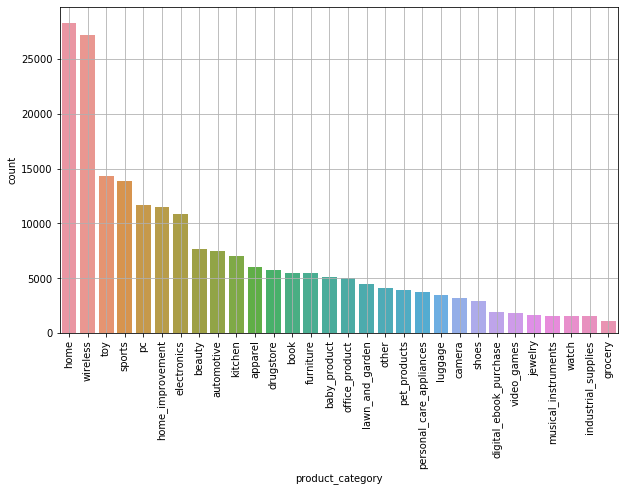

In [13]:
categoria_productos=result['product_category'].value_counts()
print(categoria_productos)
plt.figure(figsize=(10,6))
#tipologia.hist()
plt.xticks(rotation=90)
categoria_productos=result['product_category'].value_counts()
categoria_productos
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='product_category', data=result,order=result['product_category'].value_counts().index)#,ascending=True)
plt.grid()

In [14]:
lista_productos=categoria_productos.to_list()
categoria_productos.to_frame()

,product_category
home,28328
wireless,27208
toy,14328
sports,13856
pc,11720
home_improvement,11468
electronics,10899
beauty,7707
automotive,7495
kitchen,7028


In [15]:
lista_de_productos=result.product_category
lista_de_productos.to_list()
lista_de_productos=lista_de_productos.unique()
lista_de_productos=['wireless', 'apparel', 'sports', 'home_improvement', 'beauty',
       'home', 'baby_product', 'pc', 'toy', 'book',
       'personal_care_appliances', 'kitchen', 'lawn_and_garden',
       'pet_products', 'drugstore', 'office_product', 'furniture',
       'electronics', 'automotive', 'shoes', 'jewelry', 'luggage',
       'camera', 'industrial_supplies', 'other', 'musical_instruments',
       'grocery', 'digital_ebook_purchase', 'video_games', 'watch']
len(lista_de_productos)

30

### En el siguiente gráfico agrupamos las reseñas por puntajes y se observa que el dataset está perfectamente distribuido. Es decir que no hay nigún sesgo entre las calificaciones. 
#### Generamos un gráfico con la ditribución de estrellas

Cantidad de estrellas: 5
[1 2 3 4 5]


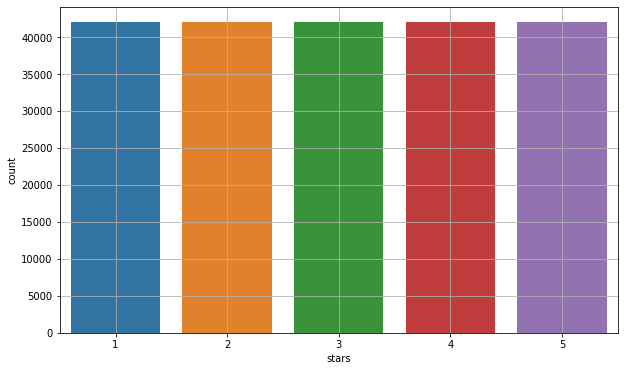

In [16]:
#Cuantos estrellas hay en este dataset?
estrellas=result['stars']

print("Cantidad de estrellas:", len(result['stars'].unique()))
print(result['stars'].unique())
plt.figure(figsize=(10,6))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=result['stars'].value_counts()
cuento_estrellas
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='stars', data=result)
plt.grid()

### Creamos un número de identificación para cada categoría

In [17]:
# converting type of columns to 'category'
result['product_category']=result['product_category'].astype('category')
# Assigning numerical values and storing in another column
result['Cat_product_category'] = result['product_category'].cat.codes
result.sort_values(by=['Cat_product_category'])
result.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,Cat_product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,29
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,0


In [18]:
# converting type of columns to 'category'
pc30['product_category']=pc30['product_category'].astype('category')
# Assigning numerical values and storing in another column
pc30['Cat_product_category'] = pc30['product_category'].cat.codes
pc30.sort_values(by=['Cat_product_category'])
pc30.head(2)
#pc30.to_excel(r'C:\Users\Alfredo\Bitácoras\TP3 DS\pc30NLP.xlsx', sheet_name='example')

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,Cat_product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,29
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,0


In [19]:
data.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel


In [20]:
# converting type of columns to 'category'
data['product_category']=data['product_category'].astype('category')
# Assigning numerical values and storing in another column
data['Cat_product_category'] = data['product_category'].cat.codes
data.sort_values(by=['Cat_product_category'])
# converting type of columns to 'category'
data_test['product_category']=data_test['product_category'].astype('category')
# Assigning numerical values and storing in another column
data_test['Cat_product_category'] = data_test['product_category'].cat.codes
data_test.sort_values(by=['Cat_product_category'])
# converting type of columns to 'category'
data_train['product_category']=data_train['product_category'].astype('category')
# Assigning numerical values and storing in another column
data_train['Cat_product_category'] = data_train['product_category'].cat.codes
data_train.sort_values(by=['Cat_product_category'])

data.head(2)
data_test.head(2)
data_train.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,Cat_product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,8
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,8


### Filtramos por tipo de producto
> En el siguiente bucle, primero creamos una lista vacía. Luego para cada categoría, generamos un dataset con todas las reseñas. En total son 30 datasets distintos, uno por cada categoría.

In [21]:
probando=[]
lista_de_productos 
for i in lista_de_productos:
    j=((result.product_category==i)&result.stars==1)|((result.product_category==i)&(result.stars==2))|((result.product_category==i)&(result.stars==3))|((result.product_category==i)&(result.stars==4))|((result.product_category==i)&(result.stars==5)).copy()     
    k=result[j].copy()
    probando.append(k)

#### Chequeamos de que la lista tenga 30 elementos.

In [22]:
len(probando)

30

## Respuesta a: 
## ¿ Cuáles categorías de productos tienen peores o mejores reseñas que otras ?
### Gráficos de todas las categorías
> En la siguiente lista de gráficos, estoy explicando la distribución de los puntajes por cada categoría. Puede ser útil para analizar diferentes comportamientos en las categorías.

> Luego de ver los gráficos vamos a ver cuales fueron las palabras más usadas en cada categoría.


C:\Users\Alfredo\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


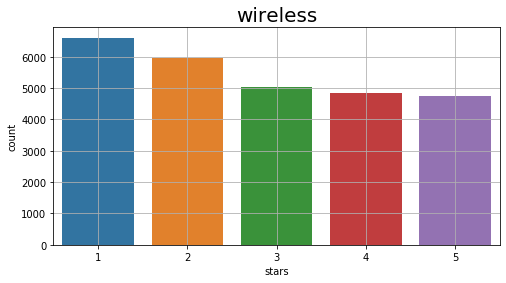

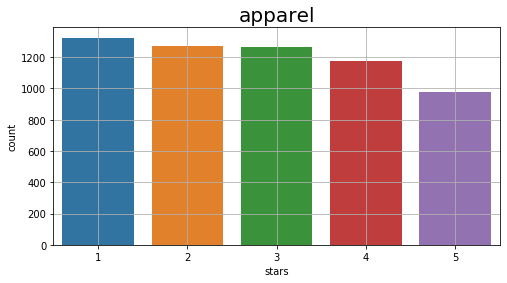

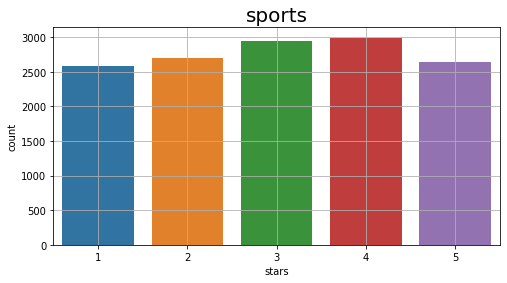

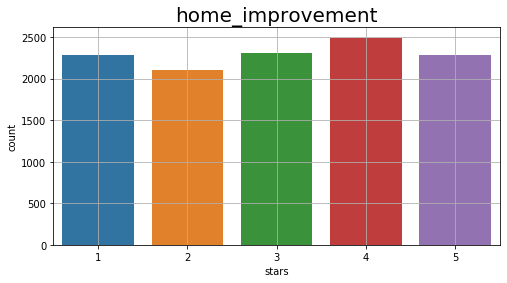

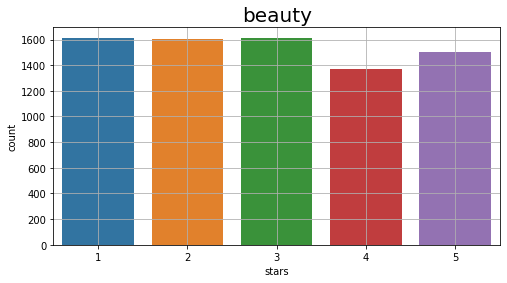

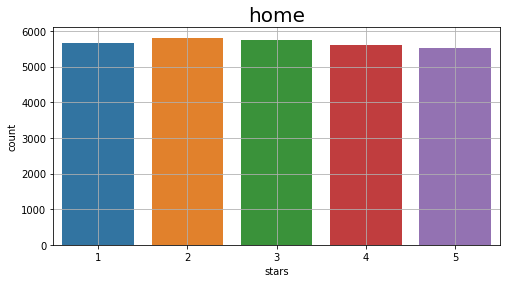

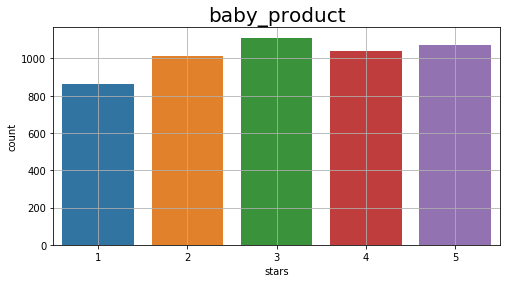

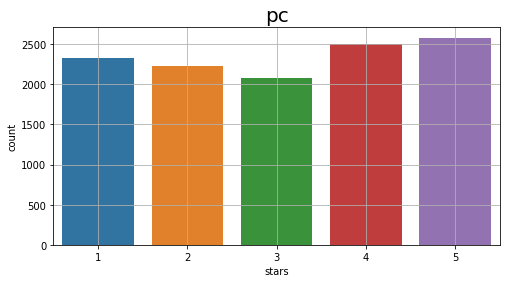

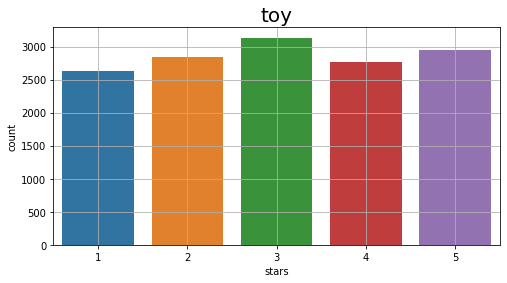

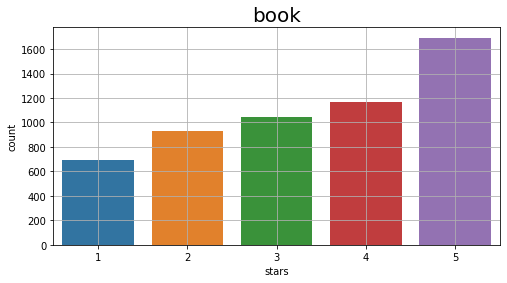

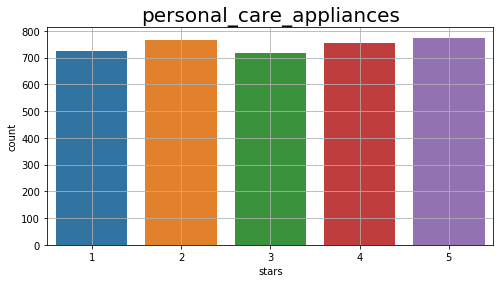

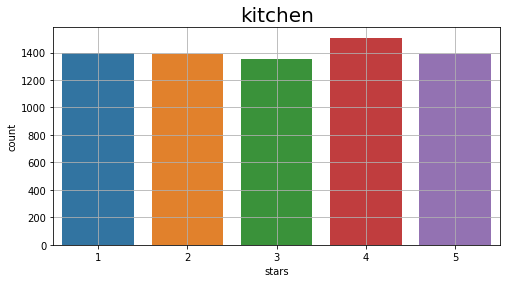

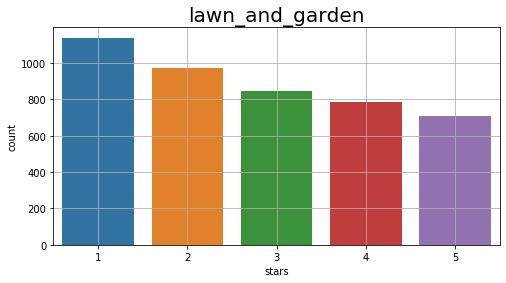

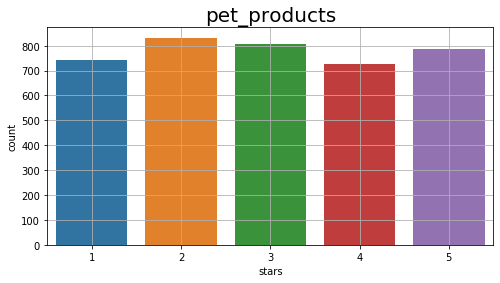

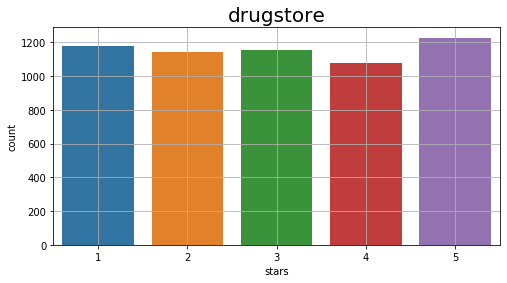

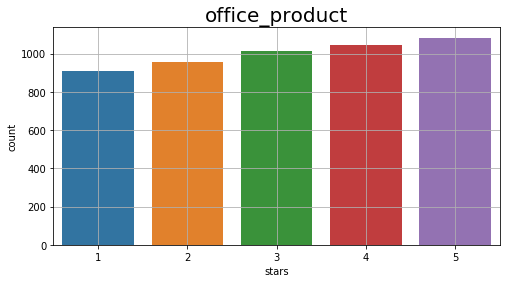

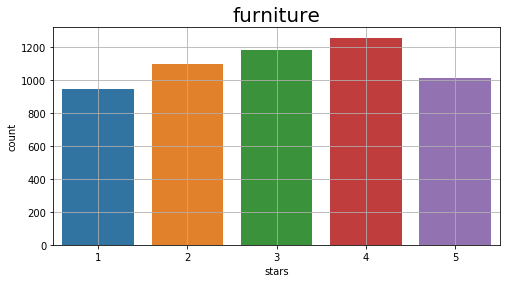

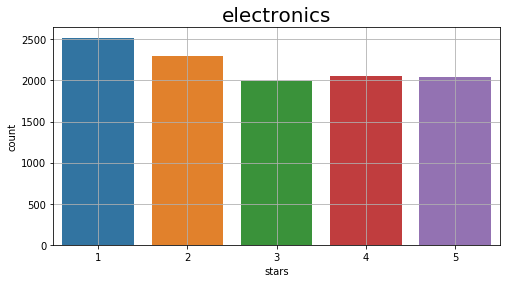

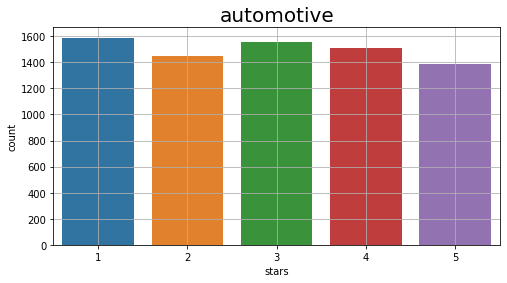

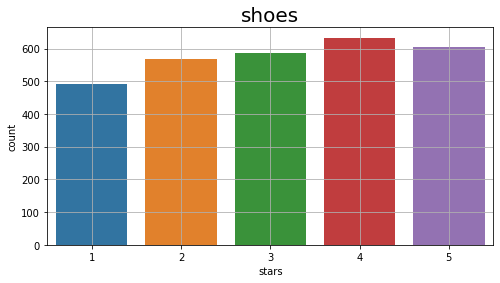

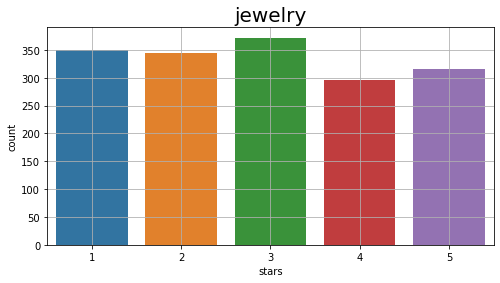

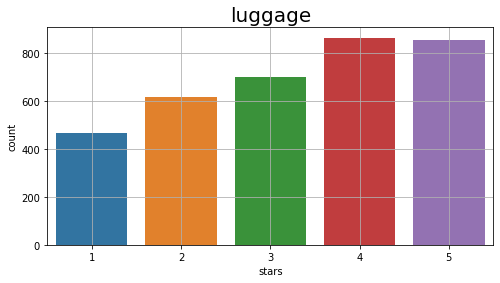

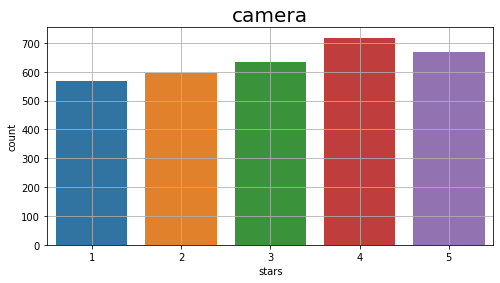

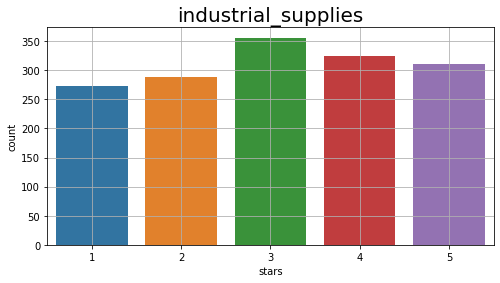

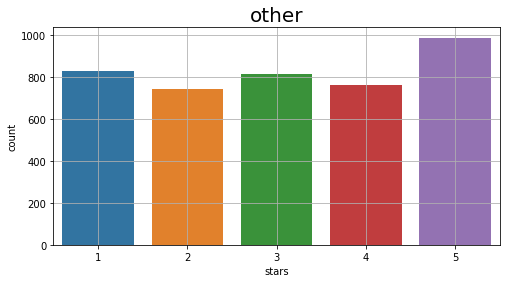

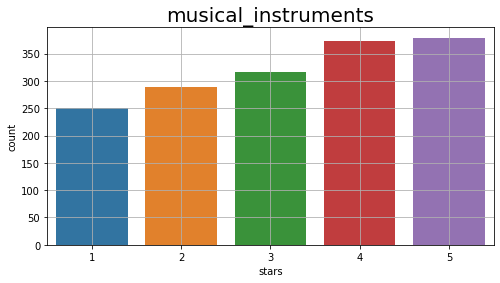

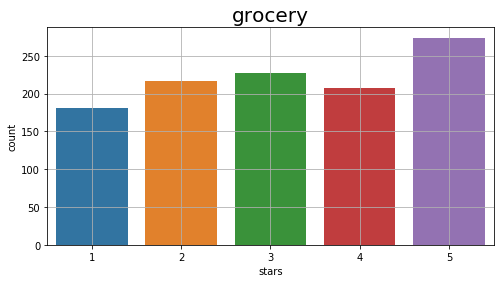

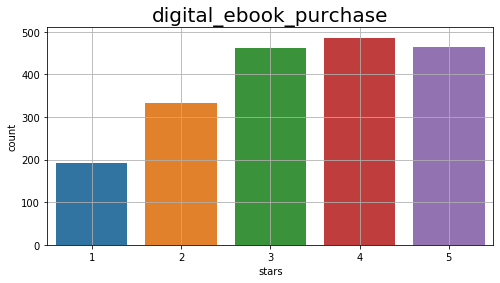

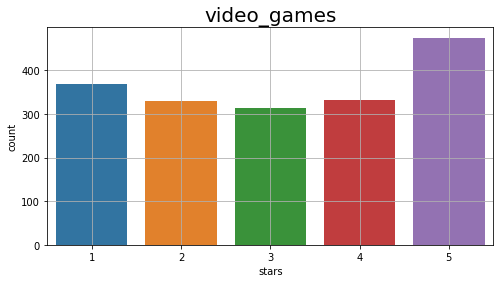

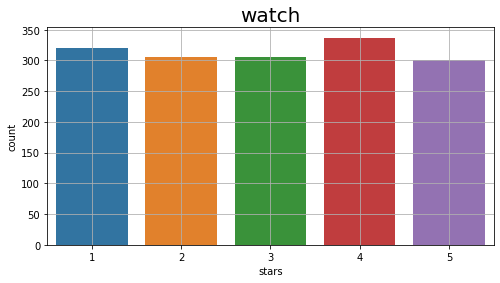

In [23]:
class Contador(object):
  def __init__(self, inicial=-1):
    self.numero = inicial
  def siguiente(self):
    self.numero += 1
    return self.numero
cuenta = Contador()
for t in probando:
    estrellas= t["stars"]
    len(t['stars'].unique())
    t['stars'].unique()
    plt.figure(figsize=(8,4))
    plt.xticks(rotation=0)
    cuento_estrellas=t['stars'].value_counts()
    cuento_estrellas
    ax = sns.countplot(x='stars', data=t)
    plt.grid()
    plt.title(lista_de_productos[cuenta.siguiente()],fontsize=20)

### Análisis de gráficos:
> Vemos que las categorías `wireless`, `lawn_and_garden`, `electronics` tienen un sesgo en la acumulación de estrellas. De todas las críticas que tiene, las que más se acumulan son las de 1 y 2 estrellas.

> La categoría `book`, está muy bien punteada. Tiene muchas más puntuaciones de 5 estrellas que el resto. De hecho, las puntuaciones van claramente ascendiendo del 1 al 5 con un gran ascenso en 5. 

> Una categoría muy bien punteada es `digital_ebook_purchase`. 

> Otras categorías con buenos puntajes son `lugagge` y `musical_instrumens`. Las puntuaciones van en ascenso del 1 al 5. Acumulándose por igual en 4 y 5.

> Dentro de la categoría `video_games`, el gráfico forma una especie de parábola, es decir, que en donde más se acumulan crítcas es en los extremos y en las categorías del medio (2,3 y 4) se ven aplanadas. Tiene un leve sesgo en las puntuaciones de 5 estrellas. 

> El resto de elementos de la lista;
* ['apparel', 'sports', 'home_improvement', 'beauty', 'home', 'baby_product', 'pc', 'toy', 'personal_care_appliances', 'kitchen', 'pet_products', 'drugstore', 'office_product', 'furniture', 'automotive', 'shoes', 'jewelry', 'camera', 'industrial_supplies', 'other', 'grocery', 'watch'], mantienen un comportamiento equitativo entre las diferentes puntuaciones.

In [24]:
#data.to_excel(r'C:\Users\Alfredo\Bitácoras\example.xlsx', sheet_name='example')

In [25]:
# lista_de_productos (es la lista que contiene a las categorias)
# probando (es la lista que contiene a los dataframes) 

### Tokenizing the dataset according to One star
> I want to see, what words were the most used in the reviews of a star. 
> We are a going to use, the dataset "data". Because, the "result" dataset is to heavy.

> I also want to see, wich words are the most used un the reviews for home.

### La cantidad de palabaras usadas por reseña, influye en la calificación?

In [26]:
## ESTE DATA SET ESTÁ HECHO SOLAMENTE CON EL DATASET DATA
malisimo_todo_prueba=(result.stars==1)
malisimo_todo_prueba=result[malisimo_todo_prueba].copy()
malo_todo_prueba=(result.stars==2)
malo_todo_prueba=result[malo_todo_prueba].copy()
bueno_todo_prueba=(result.stars==3)
bueno_todo_prueba=result[bueno_todo_prueba].copy()
Muy_bueno_todo_prueba=(result.stars==4)
Muy_bueno_todo_prueba=result[Muy_bueno_todo_prueba].copy()
Perfecto_todo_prueba=(result.stars==5)
Perfecto_todo_prueba=result[Perfecto_todo_prueba].copy()
print(malisimo_todo_prueba.shape)
print(malo_todo_prueba.shape)
print(bueno_todo_prueba.shape)
print(Muy_bueno_todo_prueba.shape)
print(Perfecto_todo_prueba.shape)
#malo=((result.product_category==i)&(result.stars==1))
#malo2=[]
#for i in lista_de_productos:
#    j=((data.product_category==i)&(data.stars==1)).copy()
#    k=data[j].copy()
#    malo2.append(k)

(42000, 9)
(42000, 9)
(42000, 9)
(42000, 9)
(42000, 9)


In [27]:
cantidad_criticasmalisimas=[]
for i in malisimo_todo_prueba.review_body:
    criticas=i
    cantidad_criticasmalisimas.append(criticas)
cantidad_criticasmalas=[]
for i in malo_todo_prueba.review_body:
    criticas=i
    cantidad_criticasmalas.append(criticas)
cantidad_criticasbuenas=[]    
for i in bueno_todo_prueba.review_body:
    criticas=i
    cantidad_criticasbuenas.append(criticas)
cantidad_criticasMuybuenas=[]
for i in Muy_bueno_todo_prueba.review_body:
    criticas=i
    cantidad_criticasMuybuenas.append(criticas)    
cantidad_criticasPerfectas=[]
for i in Perfecto_todo_prueba.review_body:
    criticas=i
    cantidad_criticasPerfectas.append(criticas)    
cantidad_criticasmalisimas_tokenizadas=[]
for i in cantidad_criticasmalisimas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    cantidad_criticasmalisimas_tokenizadas.append(j)
cantidad_criticasmalas_tokenizadas=[]
for i in cantidad_criticasmalas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    cantidad_criticasmalas_tokenizadas.append(j)
cantidad_criticasbuenas_tokenizadas=[]
for i in cantidad_criticasbuenas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    cantidad_criticasbuenas_tokenizadas.append(j)
cantidad_criticasMuybuenas_tokenizadas=[]
for i in cantidad_criticasMuybuenas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    cantidad_criticasMuybuenas_tokenizadas.append(j)
cantidad_criticasPerfectas_tokenizadas=[]
for i in cantidad_criticasPerfectas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    cantidad_criticasPerfectas_tokenizadas.append(j)
criticasmalisimas_data_tokenizadas_chain = list(itertools.chain(*cantidad_criticasmalisimas_tokenizadas))
criticasmalas_data_tokenizadas_chain = list(itertools.chain(*cantidad_criticasmalas_tokenizadas))
criticasbuenas_data_tokenizadas_chain = list(itertools.chain(*cantidad_criticasbuenas_tokenizadas))
criticasMuybuenas_data_tokenizadas_chain = list(itertools.chain(*cantidad_criticasMuybuenas_tokenizadas))
criticasPerfectas_data_tokenizadas_chain = list(itertools.chain(*cantidad_criticasPerfectas_tokenizadas))

print("Cantidad de palabras en criticas malisimas: ",len(criticasmalisimas_data_tokenizadas_chain))
print("Cantidad de palabras en criticas malas: ",len(criticasmalas_data_tokenizadas_chain))
print("Cantidad de palabras en criticas buenas: ",len(criticasbuenas_data_tokenizadas_chain))
print("Cantidad de palabras en criticas Muy Buenas: ",len(criticasMuybuenas_data_tokenizadas_chain))
print("Cantidad de palabras en criticas Perfectas: ",len(criticasPerfectas_data_tokenizadas_chain))


Cantidad de palabras en criticas malisimas:  1325111
Cantidad de palabras en criticas malas:  1452134
Cantidad de palabras en criticas buenas:  1337774
Cantidad de palabras en criticas Muy Buenas:  1210119
Cantidad de palabras en criticas Perfectas:  1153607


### Podemos ver que para las críticas negativas de 1 y 2 estrellas presentan más palabras que las de 4 y 5. Mientras que las de 3 mantiene la cantidad de palabras que las criticas de 1 estrella.

In [28]:
opinionestotales=(len(criticasmalisimas_data_tokenizadas_chain)+
len(criticasmalas_data_tokenizadas_chain)+
len(criticasbuenas_data_tokenizadas_chain)+
len(criticasMuybuenas_data_tokenizadas_chain)+
len(criticasPerfectas_data_tokenizadas_chain))
opinionestotales

6478745

In [29]:
print("Porcentaje del total criticas malisimas: ",len(criticasmalisimas_data_tokenizadas_chain)/opinionestotales)
print("Porcentaje del total en criticas malas: ",len(criticasmalas_data_tokenizadas_chain)/opinionestotales)
print("Porcentaje del total en criticas buenas: ",len(criticasbuenas_data_tokenizadas_chain)/opinionestotales)
print("Porcentaje del total en criticas Muy Buenas: ",len(criticasMuybuenas_data_tokenizadas_chain)/opinionestotales)
print("Porcentaje del total en criticas Perfectas: ",len(criticasPerfectas_data_tokenizadas_chain)/opinionestotales)

Porcentaje del total criticas malisimas:  0.20453205057460974
Porcentaje del total en criticas malas:  0.2241381625608046
Porcentaje del total en criticas buenas:  0.206486595783597
Porcentaje del total en criticas Muy Buenas:  0.18678293404046617
Porcentaje del total en criticas Perfectas:  0.1780602570405225


### Bajo el calculo realizado, vemos que existe una relación entre la cantidad de palabras con la calificación del producto:
> Para las criticas de 1,2 y 3 estrellas, vemos que los compradores tienden a usar más palabras, esto puede deberse a que explican cuanto les demoro, que es lo que estaba mal, cosas que deben mejorar, entre otras  cosas.

> Mientras que en las críticas de 4 y 5 estrellas, vemos que los compradores usan criticas más cortas. Y esto puede deberse a que simplemente ponen "Era lo que esperaba" ó "Buen producto". Siendo mucho más concretos en el feedback del producto.

In [30]:
## Lista de listas
#criticasmalisimas_prueba_tokenizadas

### Stop words en Español

In [31]:
stop_words=set(stopwords.words("spanish"))
#stop_words

#### Agrego al stop words, elementos que se repiten mucho en las criticas

In [32]:
stop_words.add('.')
stop_words.add(',')
stop_words.add('En')
stop_words.add('La')
stop_words.add('El')
stop_words.add('La')
stop_words.add('Es')
stop_words.add('Lo')
stop_words.add('Me')
stop_words.add('Se')
stop_words.add(')')
stop_words.add('(')
stop_words.add('por')

In [33]:
#stop_words

## Que palabras fueron las más usadas para las críticas de una estrella?

### Vemos la distribución de palabras para las criticas de 1 estrella.

In [34]:
malisimo_10mil=((pc30.stars==1))
malisimo_10mil=pc30[malisimo_10mil].copy()
malisimo_10mil.shape

(12600, 9)

Cantidad de estrellas: 1
[1]
1    12600
Name: stars, dtype: int64


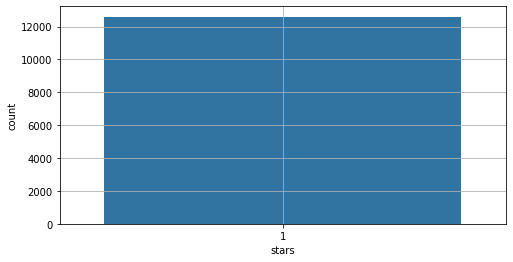

In [35]:
estrellas=malisimo_10mil['stars']
print("Cantidad de estrellas:", len(malisimo_10mil['stars'].unique()))
print(malisimo_10mil['stars'].unique())
plt.figure(figsize=(8,4))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=malisimo_10mil['stars'].value_counts()
print(cuento_estrellas)
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='stars', data=malisimo_10mil)
plt.grid()

In [36]:
malisimo_criticas=[]
for i in malisimo_10mil.review_body:
    criticas=i
    malisimo_criticas.append(criticas)
#malisimo_criticas #(es la lista con todas las reviews)

## Tokenizamos las críticas de 1 estrella.

In [37]:
criticas_malisimo10mil_tokenizadas=[]
for i in malisimo_criticas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    criticas_malisimo10mil_tokenizadas.append(j) 

In [38]:
palabras_criticas_malisimo10mil_tokenizadas = list(itertools.chain(*criticas_malisimo10mil_tokenizadas))

In [39]:
len(palabras_criticas_malisimo10mil_tokenizadas)

392980

## Filtramos por stop words las críticas tokenizadas de 1 estrella.

In [40]:
filtered_sentence_malisimo10mil=[]
for w in palabras_criticas_malisimo10mil_tokenizadas:
    if w not in stop_words:
        filtered_sentence_malisimo10mil.append(w)

In [41]:
len(filtered_sentence_malisimo10mil)

189728

## Stemming
> Stemmizamos las críticas de 1 estrella.

In [42]:
ps=PorterStemmer()
# la lista es: filtered_sentence_malisimo
filtered_sentence_malisimo10mil_stemmizado=[]
for w in filtered_sentence_malisimo10mil:
    j=ps.stem(w)
    filtered_sentence_malisimo10mil_stemmizado.append(j)

In [43]:
df_de_palabras_una_estrellas = DataFrame(filtered_sentence_malisimo10mil_stemmizado,columns=['Palabras_1_star'])
df_de_palabras_una_estrellas =df_de_palabras_una_estrellas.groupby(["Palabras_1_star"]).size().reset_index(name="Frecuencia_1") 
df_de_palabras_una_estrellas =df_de_palabras_una_estrellas.sort_values(by="Frecuencia_1",ascending=False)
sumfreq1=df_de_palabras_una_estrellas.Frecuencia_1.sum()
print('Total de palabras en 1 stars: ',sumfreq1)
df_de_palabras_una_estrellas['Importancia%'] = (df_de_palabras_una_estrellas.Frecuencia_1/sumfreq1)*100
df_de_palabras_una_estrellas.head(30)

Total de palabras en 1 stars:  189728


,Palabras_1_star,Frecuencia_1,Importancia%
723,No,4298,2.265348
11837,producto,2399,1.264442
53,...,1855,0.977715
0,!,1791,0.943983
2394,bien,1383,0.728938
2748,calidad,1280,0.674650
13589,si,1246,0.656730
5471,do,1070,0.563965
5616,día,1070,0.563965
9021,llegado,1002,0.528124


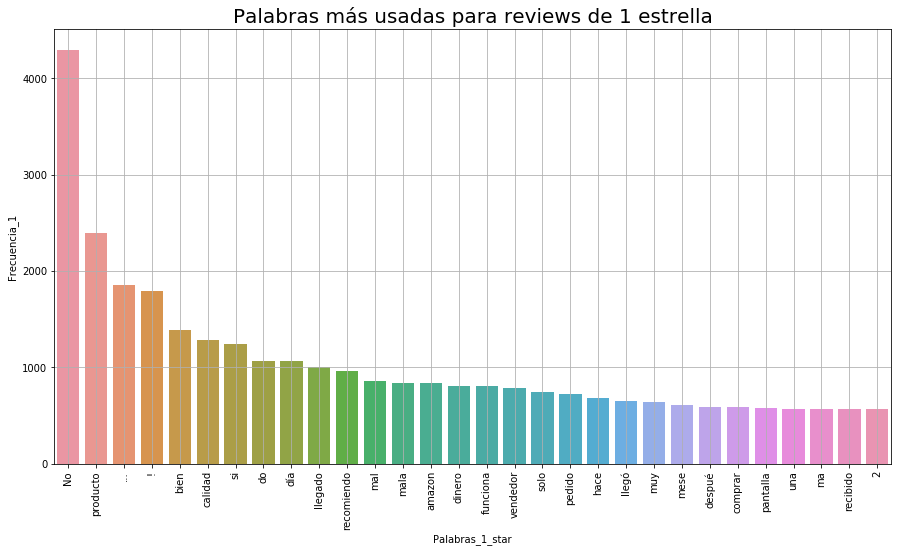

In [44]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_de_palabras_una_estrellas.iloc[:30].Palabras_1_star, y = df_de_palabras_una_estrellas.iloc[:30].Frecuencia_1)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.grid()
plt.title('Palabras más usadas para reviews de 1 estrella',fontsize=20)
plt.show()

### Vemos la distribución de palabras para las criticas de 2 estrellas.

In [45]:
malo_10mil=((pc30.stars==2))
malo_10mil=pc30[malo_10mil].copy()
malo_10mil.shape

(12600, 9)

Cantidad de estrellas: 1
[2]
2    12600
Name: stars, dtype: int64


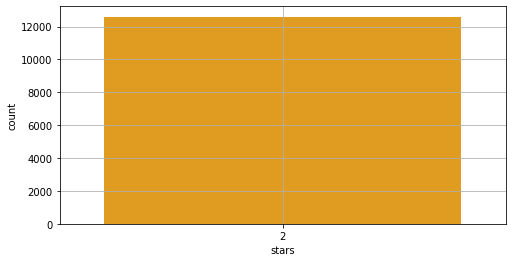

In [46]:
estrellas=malo_10mil['stars']
print("Cantidad de estrellas:", len(malo_10mil['stars'].unique()))
print(malo_10mil['stars'].unique())
plt.figure(figsize=(8,4))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=malo_10mil['stars'].value_counts()
print(cuento_estrellas)
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='stars', data=malo_10mil,palette=["orange"])
plt.grid()

In [47]:
malas_criticas=[]
for i in malo_10mil.review_body:
    criticas=i
    malas_criticas.append(criticas)
#malas_criticas #(es la lista con todas las reviews)

## Tokenizamos las críticas de 2 estrellas.

In [48]:
criticas_malas10mil_tokenizadas=[]
for i in malas_criticas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    criticas_malas10mil_tokenizadas.append(j) 

In [49]:
palabras_criticas_malas10mil_tokenizadas = list(itertools.chain(*criticas_malas10mil_tokenizadas))

In [50]:
len(palabras_criticas_malas10mil_tokenizadas)

436389

## Filtramos por stop words las críticas tokenizadas de 2 estrellas. 

In [51]:
filtered_sentence_malas10mil=[]
for w in palabras_criticas_malas10mil_tokenizadas:
    if w not in stop_words:
        filtered_sentence_malas10mil.append(w)

In [52]:
len(filtered_sentence_malas10mil)

203771

## Stemming
> Stemmizamos las críticas de 2 estrellas

In [53]:
ps=PorterStemmer()
# la lista es: filtered_sentence_malisimo
filtered_sentence_malas10mil_stemmizado=[]
for w in filtered_sentence_malas10mil:
    j=ps.stem(w)
    filtered_sentence_malas10mil_stemmizado.append(j)

In [54]:
df_de_palabras_dos_estrellas = DataFrame(filtered_sentence_malas10mil_stemmizado,columns=['Palabras_2_stars'])
df_de_palabras_dos_estrellas = df_de_palabras_dos_estrellas.groupby(["Palabras_2_stars"]).size().reset_index(name="Frecuencia_2") 
df_de_palabras_dos_estrellas = df_de_palabras_dos_estrellas.sort_values(by="Frecuencia_2",ascending=False)
sumfreq2=df_de_palabras_dos_estrellas.Frecuencia_2.sum()
print('Total de palabras en 2 stars: ',sumfreq2)
df_de_palabras_dos_estrellas['Importancia%']=(df_de_palabras_dos_estrellas.Frecuencia_2/sumfreq2)*100
df_de_palabras_dos_estrellas.head(30)

Total de palabras en 2 stars:  203771


,Palabras_2_stars,Frecuencia_2,Importancia%
740,No,3073,1.508065
2637,bien,3033,1.488436
3049,calidad,1833,0.899539
46,...,1820,0.893159
14573,si,1712,0.840159
12668,producto,1494,0.733176
12457,precio,1041,0.510868
5924,do,993,0.487312
2552,bastant,859,0.421552
2851,buena,812,0.398487


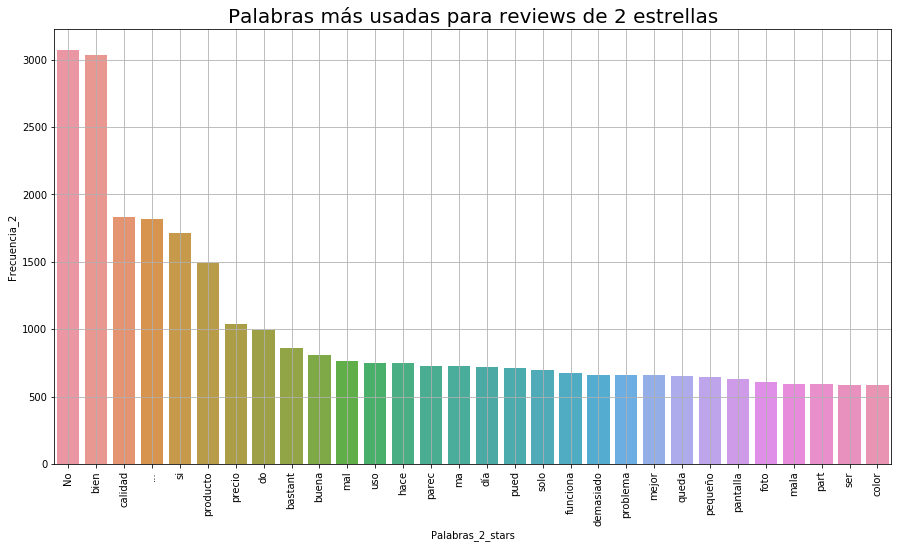

In [55]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_de_palabras_dos_estrellas.iloc[:30].Palabras_2_stars, y = df_de_palabras_dos_estrellas.iloc[:30].Frecuencia_2)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.grid()
plt.title('Palabras más usadas para reviews de 2 estrellas',fontsize=20)
plt.show()

### Vemos la distribución de palabras para las criticas de 3 estrellas.

In [56]:
bueno_10mil=((pc30.stars==3))
bueno_10mil=pc30[bueno_10mil].copy()
bueno_10mil.shape

(12600, 9)

Cantidad de estrellas: 1
[3]
3    12600
Name: stars, dtype: int64


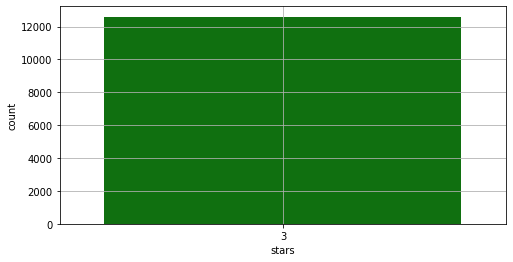

In [57]:
estrellas=bueno_10mil['stars']
print("Cantidad de estrellas:", len(bueno_10mil['stars'].unique()))
print(bueno_10mil['stars'].unique())
plt.figure(figsize=(8,4))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=bueno_10mil['stars'].value_counts()
print(cuento_estrellas)
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='stars', data=bueno_10mil,palette=["green"])
plt.grid()

In [58]:
buenas_criticas=[]
for i in bueno_10mil.review_body:
    criticas=i
    buenas_criticas.append(criticas)
#buenas_criticas #(es la lista con todas las reviews)

## Tokenizamos las críticas de 3 estrellas

In [59]:
criticas_buenas10mil_tokenizadas=[]
for i in buenas_criticas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    criticas_buenas10mil_tokenizadas.append(j) 

In [60]:
palabras_criticas_buenas10mil_tokenizadas = list(itertools.chain(*criticas_buenas10mil_tokenizadas))

In [61]:
len(palabras_criticas_buenas10mil_tokenizadas)

400549

## Filtramos por stop words las críticas tokenizadas de 3 estrellas.

In [62]:
filtered_sentence_bueno10mil=[]
for w in palabras_criticas_buenas10mil_tokenizadas:
    if w not in stop_words:
        filtered_sentence_bueno10mil.append(w)

In [63]:
len(filtered_sentence_bueno10mil)

186853

## Stemming
> Stemmizamos las críticas de 3 estrellas

In [64]:
ps=PorterStemmer()
# la lista es: filtered_sentence_malisimo
filtered_sentence_bueno10mil_stemmizado=[]
for w in filtered_sentence_bueno10mil:
    j=ps.stem(w)
    filtered_sentence_bueno10mil_stemmizado.append(j)

In [65]:
df_de_palabras_tres_estrellas = DataFrame(filtered_sentence_bueno10mil_stemmizado,columns=['Palabras_3_stars'])
df_de_palabras_tres_estrellas=df_de_palabras_tres_estrellas.groupby(["Palabras_3_stars"]).size().reset_index(name="Frecuencia_3") 
sumfreq3=df_de_palabras_tres_estrellas.Frecuencia_3.sum()
print('Total de palabras en 3 stars: ',sumfreq3)
df_de_palabras_tres_estrellas=df_de_palabras_tres_estrellas.sort_values(by="Frecuencia_3",ascending=False)
df_de_palabras_tres_estrellas['Importancia%']=(df_de_palabras_tres_estrellas.Frecuencia_3/sumfreq3)*100
df_de_palabras_tres_estrellas.head(30)

Total de palabras en 3 stars:  186853


,Palabras_3_stars,Frecuencia_3,Importancia%
2489,bien,4345,2.325357
654,No,1855,0.992759
2916,calidad,1753,0.938171
13915,si,1689,0.903919
11948,precio,1640,0.877695
51,...,1442,0.771730
12140,producto,1255,0.671651
2725,buena,1130,0.604753
2405,bastant,1092,0.584417
2181,aunqu,922,0.493436


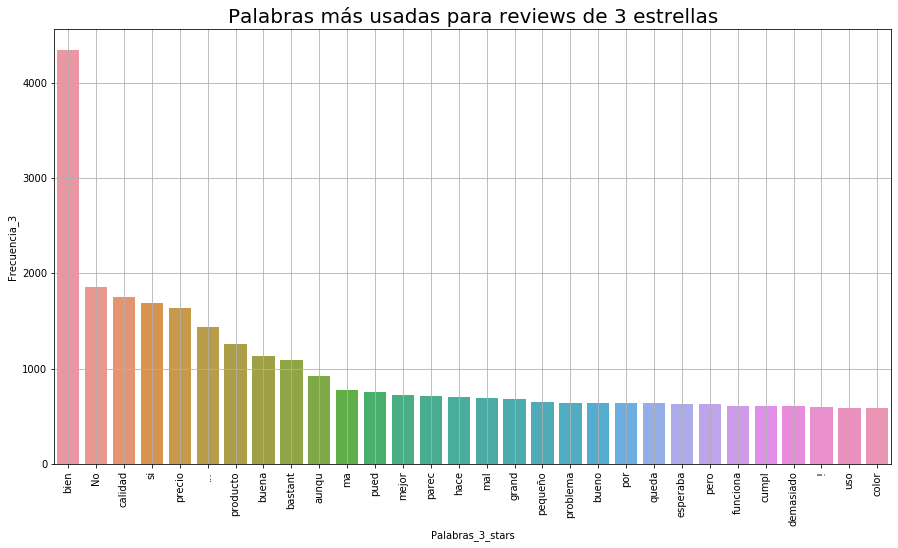

In [66]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_de_palabras_tres_estrellas.iloc[:30].Palabras_3_stars, y = df_de_palabras_tres_estrellas.iloc[:30].Frecuencia_3)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.grid()
plt.title('Palabras más usadas para reviews de 3 estrellas',fontsize=20)
plt.show()

### Ahora queremos ver la distribución de palabras para las criticas de 4 estrellas.

In [67]:
Muy_bueno_10mil=((pc30.stars==4))
Muy_bueno_10mil=pc30[Muy_bueno_10mil].copy()
Muy_bueno_10mil.shape

(12600, 9)

In [68]:
muybuenas_criticas=[]
for i in Muy_bueno_10mil.review_body:
    criticas=i
    muybuenas_criticas.append(criticas)
#muybuenas_criticas (es la lista con todas las reviews)

Cantidad de estrellas: 1
[4]
4    12600
Name: stars, dtype: int64


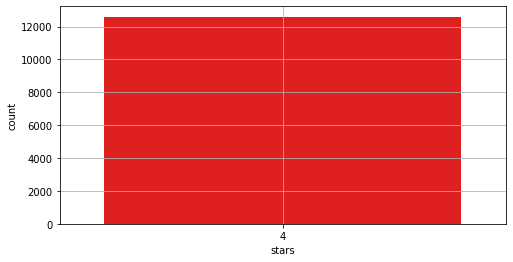

In [69]:
estrellas=Muy_bueno_10mil['stars']
print("Cantidad de estrellas:", len(Muy_bueno_10mil['stars'].unique()))
print(Muy_bueno_10mil['stars'].unique())
plt.figure(figsize=(8,4))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=Muy_bueno_10mil['stars'].value_counts()
print(cuento_estrellas)
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='stars', data=Muy_bueno_10mil,palette=["red"])
plt.grid()

In [70]:
muybuenas_criticas=[]
for i in Muy_bueno_10mil.review_body:
    criticas=i
    muybuenas_criticas.append(criticas)
#muybuenas_criticas (es la lista con todas las reviews)

## Tokenizamos las críticas de 4 estrellas.

In [71]:
criticas_muybuenas10mil_tokenizadas=[]
for i in muybuenas_criticas:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    criticas_muybuenas10mil_tokenizadas.append(j)    

In [72]:
palabras_criticas_muybuenas10mil_tokenizadas = list(itertools.chain(*criticas_muybuenas10mil_tokenizadas))

## Filtramos por stop words las críticas tokenizadas de 4 estrellas.

In [73]:
filtered_sentence_muybueno10mil=[]
for w in palabras_criticas_muybuenas10mil_tokenizadas:
    if w not in stop_words:
        filtered_sentence_muybueno10mil.append(w)

In [74]:
len(filtered_sentence_muybueno10mil)

172085

## Stemming
> Stemmizamos las criticas de 4 estrellas.

In [75]:
ps=PorterStemmer()
# la lista es: filtered_sentence_malisimo
filtered_sentence_muybueno10mil_stemmizado=[]
for w in filtered_sentence_muybueno10mil:
    j=ps.stem(w)
    filtered_sentence_muybueno10mil_stemmizado.append(j)

In [76]:
df_de_palabras_cuatro_estrellas = DataFrame(filtered_sentence_muybueno10mil_stemmizado,columns=['Palabras_4_stars'])
df_de_palabras_cuatro_estrellas=df_de_palabras_cuatro_estrellas.groupby(["Palabras_4_stars"]).size().reset_index(name="Frecuencia_4") 
sumfreq4=df_de_palabras_cuatro_estrellas.Frecuencia_4.sum()
print('Total de palabras en 4 stars: ',sumfreq4)
df_de_palabras_cuatro_estrellas=df_de_palabras_cuatro_estrellas.sort_values(by="Frecuencia_4",ascending=False)
df_de_palabras_cuatro_estrellas['Importancia%']=(df_de_palabras_cuatro_estrellas.Frecuencia_4/sumfreq4)*100
df_de_palabras_cuatro_estrellas.head(30)

Total de palabras en 4 stars:  172085


,Palabras_4_stars,Frecuencia_4,Importancia%
2320,bien,4428,2.573147
2710,calidad,2133,1.239504
2531,buena,2132,1.238923
11167,precio,2000,1.162216
11386,producto,1409,0.818781
2529,buen,1241,0.721155
2236,bastant,1159,0.673504
13014,si,1150,0.668274
9597,muy,1014,0.589244
4222,cumpl,942,0.547404


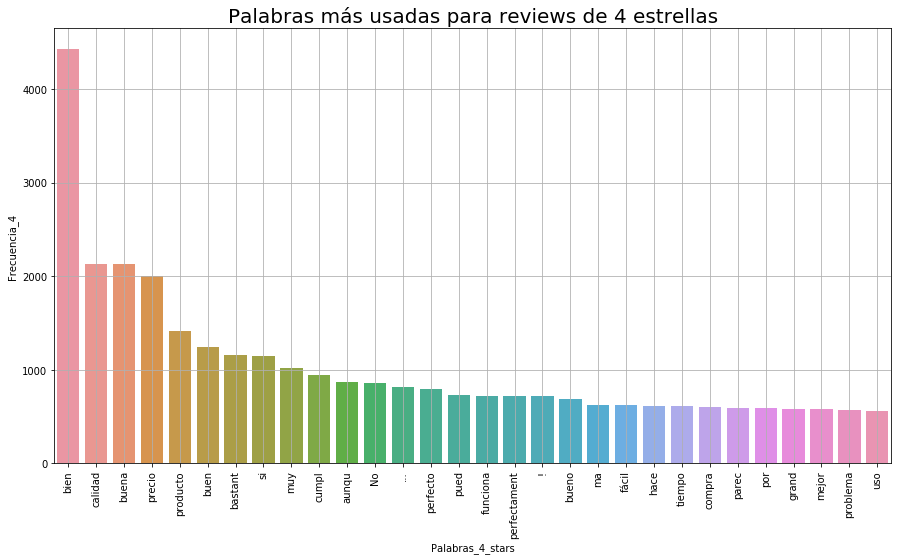

In [77]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_de_palabras_cuatro_estrellas.iloc[:30].Palabras_4_stars, y = df_de_palabras_cuatro_estrellas.iloc[:30].Frecuencia_4)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.grid()
plt.title('Palabras más usadas para reviews de 4 estrellas',fontsize=20)
plt.show()

### Ahora queremos ver la distribución de palabras para las criticas de 5 estrellas.

In [78]:
perfecto_10mil=((pc30.stars==5))
perfecto_10mil=pc30[perfecto_10mil].copy()
perfecto_10mil.shape

(12600, 9)

Cantidad de estrellas: 1
[5]
5    12600
Name: stars, dtype: int64


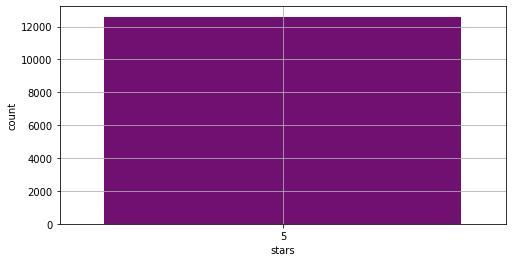

In [79]:
estrellas=perfecto_10mil['stars']
print("Cantidad de estrellas:", len(perfecto_10mil['stars'].unique()))
print(perfecto_10mil['stars'].unique())
plt.figure(figsize=(8,4))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=perfecto_10mil['stars'].value_counts()
print(cuento_estrellas)
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='stars', data=perfecto_10mil,palette=["purple"])
plt.grid()

In [80]:
criticasperfectas_pc30=[]
for i in perfecto_10mil.review_body:
    criticas=i
    criticasperfectas_pc30.append(criticas)

### Esta lista se deja comentada, es la lista de criticas perfectas.

In [81]:
#criticasperfectas_pc30

In [82]:
len(criticasperfectas_pc30)

12600

## Tokenizamos las críticas de 5 estrellas

In [83]:
criticas_perfectas_pc30_tokenizadas=[]
for i in criticasperfectas_pc30:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    criticas_perfectas_pc30_tokenizadas.append(j)

In [84]:
#criticas_perfectas_pc30_tokenizadas

In [85]:
palabras_criticas_perfectas_pc30_tokenizadas = list(itertools.chain(*criticas_perfectas_pc30_tokenizadas))

In [86]:
len(palabras_criticas_perfectas_pc30_tokenizadas)

345703

In [87]:
#palabras_criticas_perfectas_pc30_tokenizadas

## Filtramos por stop words las críticas tokenizadas de 5 estrellas.

In [88]:
filtered_sentence_perfecto_pc30=[]
for w in palabras_criticas_perfectas_pc30_tokenizadas:
    if w not in stop_words:
        filtered_sentence_perfecto_pc30.append(w)

In [89]:
len(filtered_sentence_perfecto_pc30)

168511

## Stemming
> Stemmizamos las criticas de 5 estrellas

In [90]:
ps=PorterStemmer()
# la lista es: filtered_sentence_malisimo
filtered_sentence_perfecto_pc30_stemmizado=[]
for w in filtered_sentence_perfecto_pc30:
    j=ps.stem(w)
    filtered_sentence_perfecto_pc30_stemmizado.append(j)

In [91]:
df_de_palabras_cinco_estrellas = DataFrame(filtered_sentence_perfecto_pc30_stemmizado,columns=['Palabras_5_stars'])
df_de_palabras_cinco_estrellas=df_de_palabras_cinco_estrellas.groupby(["Palabras_5_stars"]).size().reset_index(name="Frecuencia_5")
sumfreq5=df_de_palabras_cinco_estrellas.Frecuencia_5.sum()
print('Total de palabras en 5 stars: ',sumfreq5)
df_de_palabras_cinco_estrellas=df_de_palabras_cinco_estrellas.sort_values(by="Frecuencia_5",ascending=False)
df_de_palabras_cinco_estrellas['Importancia%']=(df_de_palabras_cinco_estrellas.Frecuencia_5/sumfreq5)*100
df_de_palabras_cinco_estrellas[0:30]

Total de palabras en 5 stars:  168511


,Palabras_5_stars,Frecuencia_5,Importancia%
2267,bien,2921,1.733418
2643,calidad,2423,1.437888
2475,buena,2321,1.377358
0,!,1795,1.065212
9457,muy,1690,1.002902
10921,precio,1645,0.976197
10412,perfecto,1612,0.956614
11136,producto,1489,0.883622
2474,buen,1283,0.761375
3457,compra,891,0.528749


## Que palabras fueron las más usadas para las críticas de 5 estrellas?

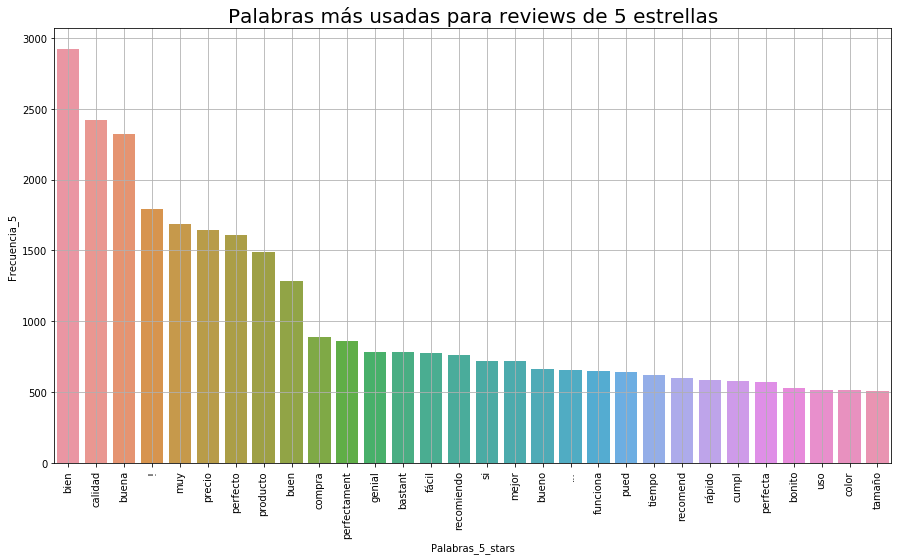

In [92]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_de_palabras_cinco_estrellas.iloc[:30].Palabras_5_stars, y = df_de_palabras_cinco_estrellas.iloc[:30].Frecuencia_5)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.grid()
plt.title('Palabras más usadas para reviews de 5 estrellas',fontsize=20)
plt.show()

#### Creamos listas de las palabras más usadas:

In [93]:
palabras_1=df_de_palabras_una_estrellas['Palabras_1_star'][0:30].to_list()
palabras_2=df_de_palabras_dos_estrellas['Palabras_2_stars'][0:30].to_list()
palabras_3=df_de_palabras_tres_estrellas['Palabras_3_stars'][0:30].to_list()
palabras_4=df_de_palabras_cuatro_estrellas['Palabras_4_stars'][0:30].to_list()
palabras_5=df_de_palabras_cinco_estrellas['Palabras_5_stars'][0:30].to_list()

#### Vemos cuales de las primeras 30 palabras más repetidas se repiten en cada una de las estrellas

In [94]:
coincide4y5=[]
for i in palabras_4:
    for j in palabras_5:
        if i==j:
            coincide4y5.append(i)
coincide4y5con3=[]
for i in coincide4y5:
    for j in palabras_3:
        if i==j:
            coincide4y5con3.append(i)
coincide3y4y5con2=[]
for i in coincide4y5con3:
    for j in palabras_2:
        if i==j:
            coincide3y4y5con2.append(i)
coincide2y3y4y5con1=[]
for i in coincide3y4y5con2:
    for j in palabras_1:
        if i==j:
            coincide2y3y4y5con1.append(i)            

#### La siguiente lista nos muestra cuales son las palabras que se repiten en el top 30 en todos los puntajes.

In [95]:
coincide2y3y4y5con1

['bien', 'calidad', 'producto', 'si', '...', 'funciona']

# Respuesta a la pregunta: ¿ Cuáles son las palabras más utilizadas en cada puntaje y que relación se le encuentra con el mismo?

## Conclusiones:
### Análisis de los graficos anteriores y sus dataframes:
> Hemos visto que los siguientes elementos se repiten en todas las estrellas:
    * ['bien', 'calidad', 'producto', 'si', '...', 'funciona']

##### **Palabras más relevantes del gráfico de 1 estrella:**

No: es la palabra más repetida. Está repetida 4298 veces.
Lo que me parece sumamente lógico, 
que tenga que ver con una connotación negativa de las criticas.
producto: Se repite 2399 veces. Es la palabra más repetida seguido de No,
lo que también me parece que tiene mucho sentido,
ya que al no estar conforme, las criticas tienden a 
ser; "No compre este producto", "No elegí este producto" 
o simplemente el lema de "No producto".
Mal, mala, recomiendo: tiene sentido que esten fuertemente vinculadas con esta
puntuación.
En este caso los tres puntos suspensivos "...", pueden hacer referencia a 
suspenso, decepción u otras cosas y suelen ser usados para lo siguiente:
-Para indicar la existencia en el discurso de una pausa transitoria que
 expresa duda, temor, vacilación o suspenso. Ejemplo "Si yo te contara como llegó el producto ..."
-Para insinuar, evitando su reproducción, expresiones o palabras malsonantes
 o inconvenientes: A veces se colocan tras la letra inicial del término que se insinúa:
" Vete a la m..."
Cuando, por cualquier otro motivo, 
se desea dejar el enunciado incompleto y en suspenso:
 "Aspecto muy desagradable..."
!= signo de exclamación 1791 veces repetido. Usualmente usado para darle énfasis
a las emociones.

##### **Palabras más relevantes del gráfico de 2 estrellas:**

No: Se repite 3073 veces. Si bien, se ve que el puntaje sigue siendo negativo,
la palabra No, que obviamente indica negación, se repite menos veces.
bien: Se repite 3033 veces. A simple vista, uno puede relacionarlo con
algo positivo, pero dado que es la segunda palabra más repetida. Claramente
está estrechamente relacionada con "No", bajo el lema de "No bien".
calidad: 1833 veces repetida.
Otro dato que también me llamó la atención fué que el caracter "!", ya no se
encuentra en el top 30 de palabras más repetidas, lo que indica que los
clientes obviamente no están satisfechos con su compra, pero al menos 
no parecen estar tan enojados, ya que no hay síntomas de querer hacer énfasis
sobre algo negativo.

##### **Palabras más relevantes del gráfico de 3 estrellas:**

Vemos como el panorama de negatividad empieza a cambiar y 
que ya no figura la palabra "No" primera en el ranking.
bien: Se repite 4345 veces. 
No: Se repite 1855.
Puede estar relacionado al lema "No estoy conforme".
Y algo que me pareció curioso fué la presencia en el top 10 de la
palabra "aunque". Lo que indica que el cliente compró algo que le puede 
servir o que cumple en parte sus expectativas, "aunque" no del todo.
Cabe notar que las palabras derivadas de "puede" y "mejor/mejorar".
Haciendo referencia al lema de "puede mejorar" ó "puede estar mejor"
Aparecen en el top 15 de la lista, y es claro que el cliente no está
completamente satisfecho con su compra. Y tiene intenciones de mejora.

##### **Palabras más relevantes del gráfico de 4 estrellas:**

Es bastante claro que hay mucha más palabras positivas a partir de 
las 4 estrellas:
bien: 4428 veces repetida
calidad: 2133 veces repetida
buena: 2132 veces repetida
buen: 1241
Son palabras que marcan una significativa satisfacción.

##### **Palabras más relevantes del gráfico de 5 estrellas:**

Me llamó la atención que la palabra bien no se repitiera bastante.
bien: 2921 veces repetida.
calidad: 2423 veces repetida
buena: 2321 veces repetida
Pero luego al ver la nueva aparición del signo de exlamación "!"
en el top 5 
!: 1795 veces repetido.
Se puede ver que el cliente hizo énfasis en su satisfacción con el producto.
Y además vemos que aparece la palabra "perfecto" dentro del top 10 de palabras 
más repetidas.

En conclusión puedemos afirmar que el uso de ciertas palabras en
las críticas están relacionadas con el puntaje dado y con el grado de 
conformidad del cliente con respecto al producto.

# Parte B - Modelo de Machine Learning
1- Debes evaluar correctamente el modelo que realices. Esto implica un correcto manejo de datos de Train y Test, elegir una métrica apropiada y justificar su elección, y comparar los resultados contra un modelo benchmark.

2- Puedes aplicar más de una de las técnicas vistas para crear tus modelos. Pero ten en cuenta que es preferible un modelo bien hecho (apropiada transformación de datos, optimización de hiperparámetros y análisis de sus resultados) que muchos modelos a medias. En caso de entrenar más de un modelo, debes comparar sus resultados y justificar cuál elegirías.

3- Si el modelo lo permite, debes explorar qué información utiliza para predecir e interpretar ese resultado. ¿Coincide con lo que esperabas a partir de tu experiencia con el dataset?

In [96]:
data["Length_Review"]=(data.apply(lambda x: len(x.review_body), axis=1))
pc30["Length_Review"]=(pc30.apply(lambda x: len(x.review_body), axis=1))

In [97]:
pc30.head(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,Cat_product_category,Length_Review
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,29,68
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,0,41
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports,25,170
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement,12,308
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty,3,42


In [98]:
len(data.review_body[1])

41

In [99]:
#titular_wt = nltk.tokenize.word_tokenize(data.review_body)
#titular_wt
review_body_tokenizado=[]
for i in data.review_body:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    review_body_tokenizado.append(j)

In [100]:
#titular_wt = nltk.tokenize.word_tokenize(data.review_body)
#titular_wt
review_body_tokenizadopc30=[]
for i in pc30.review_body:## Osea la lista entera de criticas
    j=nltk.tokenize.word_tokenize(i)
    review_body_tokenizadopc30.append(j)

In [101]:
pc30.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,Cat_product_category,Length_Review
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,29,68
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,0,41


In [102]:
type(review_body_tokenizado)

list

In [103]:
data['review_body_tokenizado']=review_body_tokenizado

In [104]:
pc30['review_body_tokenizado']=review_body_tokenizadopc30

In [105]:
## Guardamos el archivo del 30% de los datos en un excel, para usarlo luego en el machine learning
#pc30.to_excel(r'C:\Users\Alfredo\Bitácoras\TP3 DS\pc30NLP.xlsx', sheet_name='example')

#### Creamos el bag of words de todas las estrellas

In [106]:
palabras_1=df_de_palabras_una_estrellas['Palabras_1_star'].to_list()
palabras_2=df_de_palabras_dos_estrellas['Palabras_2_stars'].to_list()
palabras_3=df_de_palabras_tres_estrellas['Palabras_3_stars'].to_list()
palabras_4=df_de_palabras_cuatro_estrellas['Palabras_4_stars'].to_list()
palabras_5=df_de_palabras_cinco_estrellas['Palabras_5_stars'].to_list()

#print('Bag of words estrella 1 ------------------------------------------------------------------------------\n')
#print(palabras_1[0:1000])
#print('\nBag of words estrella 2 ------------------------------------------------------------------------------\n')
#print(palabras_2[0:1000])
#print('\nBag of words estrella 3 ------------------------------------------------------------------------------\n')
#print(palabras_3[0:1000])
#print('\nBag of words estrella 4 ------------------------------------------------------------------------------\n')
#print(palabras_4[0:1000])
#print('\nBag of words estrella 5 ------------------------------------------------------------------------------\n')
#print(palabras_5[0:1000])

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000
# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

In [109]:
cou_vec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

## Cuento las mayúsculas por review

In [110]:
mayusculas=[]
for c in pc30.review_body:
    cuenta=0
    for i in c:
        if i.isupper():
            cuenta+=1
    mayusculas.append(cuenta)            
#print (mayusculas)

In [111]:
mayusculas=pd.DataFrame(mayusculas,columns=['Cantidad_Mayus'])
pc30['Cantidad_Mayus']=mayusculas

## Cuento las minúsculas por review

In [112]:
minusculas=[]
for c in pc30.review_body:
    cuenta=0
    for i in c:
        if i.islower():
            cuenta+=1
    minusculas.append(cuenta)            
#print (minusculas)

In [113]:
minusculas=pd.DataFrame(minusculas,columns=['Cantidad_Minusculas'])
pc30['Cantidad_Minusculas']=minusculas

In [114]:
pc30.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,Cat_product_category,Length_Review,review_body_tokenizado,Cantidad_Mayus,Cantidad_Minusculas
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,29,68,"[Malisimo, ,, muy, grande, demasiado, aparatos...",1.0,57.0
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,0,41,"[No, he, recibido, el, pedido, no, la, devoluc...",1.0,33.0


## Modelar
1- Debes evaluar correctamente el modelo que realices. Esto implica un correcto manejo de datos de Train y Test, elegir una métrica apropiada y justificar su elección, y comparar los resultados contra un modelo benchmark.

In [115]:
list_comentarios = list(pc30['review_body'].values)
list_titles = list(pc30['review_title'].values)
is_what = pc30['stars'].values

In [116]:
print('Cantidad de palabras en list_comentarios: ',len(list_comentarios))
print('Cantidad de palabras en list_titles: ',len(list_titles))

Cantidad de palabras en list_comentarios:  63000
Cantidad de palabras en list_titles:  63000


In [117]:
matriz_comentarios_one_star = cou_vec.fit_transform(list_comentarios)
matriz_titulos = cou_vec.fit_transform(list_titles)
# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas:\n",all_words[0:50])

50 palabras mas usadas:
 ['10', '100', 'abierta', 'abierto', 'acaba', 'acabado', 'acabados', 'accesorios', 'aceite', 'aceptable', 'acierto', 'aconsejable', 'aconsejo', 'acorde', 'adapta', 'adaptador', 'adecuada', 'adecuado', 'adherencia', 'adhesivo', 'agradable', 'agua', 'aguanta', 'ahora', 'aire', 'ajusta', 'ajuste', 'al', 'algo', 'algunas', 'algunos', 'algún', 'alta', 'altavoz', 'alto', 'altura', 'amazon', 'ana', 'antena', 'antes', 'antonio', 'anuncia', 'anunciado', 'anuncio', 'aparato', 'apenas', 'apto', 'articulo', 'artículo', 'aspecto']


## Concatenamos las matrices para que pueda tener más features a clasificar el modelo.
> Hay que tener cuidado de dejar las matrices del mismo tamaño. Mismo número de filas y unir las matrices en columnas.

In [119]:
matriz_comentarios_one_star=matriz_comentarios_one_star.toarray()
matriz_titulos=matriz_titulos.toarray()

In [120]:
matrices_concatenadas=np.concatenate((matriz_comentarios_one_star, matriz_titulos), axis=1)
matrices_concatenadas.shape

(63000, 2000)

In [121]:
pc30.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,Cat_product_category,Length_Review,review_body_tokenizado,Cantidad_Mayus,Cantidad_Minusculas
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,29,68,"[Malisimo, ,, muy, grande, demasiado, aparatos...",1.0,57.0
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,0,41,"[No, he, recibido, el, pedido, no, la, devoluc...",1.0,33.0


In [122]:
print(type(matriz_comentarios_one_star))
print(len(is_what))
is_what

<class 'numpy.ndarray'>
63000


array([1, 1, 1, ..., 5, 5, 5], dtype=int64)

    * > a. Primero, como siempre, separamos en test y train.

In [124]:
#x = panda.drop(columns=["stars"])

In [125]:
x = matriz_comentarios_one_star
y = is_what

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [126]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["1","2","3","4","5"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [127]:
confusion

<function __main__.confusion(ytest, y_pred)>

### Elegímos como Benchmark Gaussian Naive Bayes

In [128]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.38936507936507936


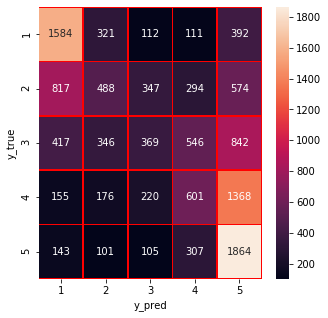

In [130]:
y_pred_nb=nb.predict(xtest)
confusion(ytest,y_pred_nb)

In [131]:
from sklearn.metrics import confusion_matrix, classification_report
report=pd.DataFrame(classification_report(ytest, y_pred_nb, output_dict=True)).transpose() #otra manera de hacer
print("Reporte de Clasificación Naive Bayes:")
report

Reporte de Clasificación Naive Bayes:


,precision,recall,f1-score,support
1,0.508344,0.628571,0.562101,2520.000000
2,0.340782,0.193651,0.246964,2520.000000
3,0.320035,0.146429,0.200926,2520.000000
4,0.323292,0.238492,0.274492,2520.000000
5,0.369841,0.739683,0.493122,2520.000000
accuracy,0.389365,0.389365,0.389365,0.389365
macro avg,0.372459,0.389365,0.355521,12600.000000
weighted avg,0.372459,0.389365,0.355521,12600.000000


### Random Forest
a. Veamos cómo funciona un random forest para predecir el sarcasmo de una nota en base a su titular.

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.4541269841269841


b. Graficando su matriz de confusión:

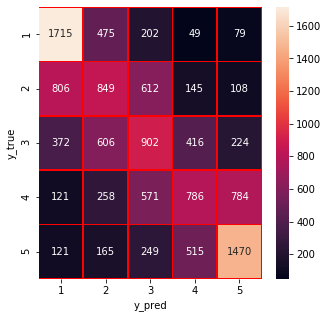

In [133]:
y_pred_rf=rf.predict(xtest)
confusion(ytest,y_pred_rf)

In [134]:
report=pd.DataFrame(classification_report(ytest, y_pred_rf, output_dict=True)).transpose() #otra manera de hacer
print("Reporte de Clasificación de Random Forest:")
report

Reporte de Clasificación de Random Forest:


,precision,recall,f1-score,support
1,0.547049,0.680556,0.606543,2520.000000
2,0.360816,0.336905,0.348451,2520.000000
3,0.355678,0.357937,0.356804,2520.000000
4,0.411303,0.311905,0.354773,2520.000000
5,0.551595,0.583333,0.567020,2520.000000
accuracy,0.454127,0.454127,0.454127,0.454127
macro avg,0.445288,0.454127,0.446718,12600.000000
weighted avg,0.445288,0.454127,0.446718,12600.000000


c. Habíamos dicho que algo muy bueno de Random Forest era poder preguntarle por la importancia de los features que uso para clasificar. Veamos en este caso cuales son las palabras que mayormente determinan el sarcasmo de una nota para este clasificador.

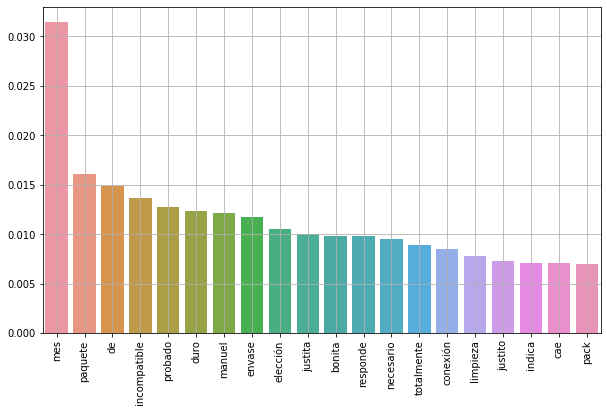

In [135]:
# Le preguntamos la importancia de cada feature (cada palabra)
importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (10,6))
sns.barplot(selected_columns, selected_importances)
plt.xticks(rotation=90)
plt.grid()
plt.show()

### SVM
Por último vamos a utilizar uno de los modelos mas prometedores para este tipo de datos donde el numero de features es comparable al número de instancias: SVM.

a. Entrene un modelo de SVM Lineal y calcule su accuracy para C = 1.

In [136]:
# Notar que en vez de utilizar SVC, vamos a usar LinearSVC. 
# Para el Kernel Lineal, esta función es MUCHO mas rapida que la tradicional SVC.
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

C:\Users\Alfredo\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4884126984126984

b. Graficando su matriz de confusión:

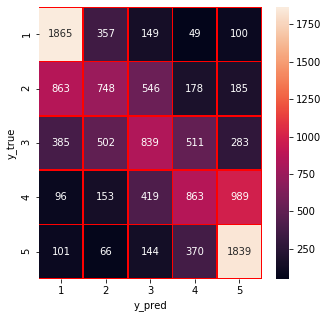

In [138]:
y_pred_svc=svc.predict(xtest)
confusion(ytest,y_pred_svc)

In [139]:
report=pd.DataFrame(classification_report(ytest, y_pred_svc, output_dict=True)).transpose() #otra manera de hacer
print("Reporte de Clasificación de Linear SVC:")
report

Reporte de Clasificación de Linear SVC:


,precision,recall,f1-score,support
1,0.563444,0.740079,0.639794,2520.000000
2,0.409639,0.296825,0.344225,2520.000000
3,0.400095,0.332937,0.363439,2520.000000
4,0.437849,0.342460,0.384324,2520.000000
5,0.541519,0.729762,0.621704,2520.000000
accuracy,0.488413,0.488413,0.488413,0.488413
macro avg,0.470509,0.488413,0.470697,12600.000000
weighted avg,0.470509,0.488413,0.470697,12600.000000


## Optimizando los modelos.

In [140]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [141]:
#%%time
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1200, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
#max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
#max_depth.append(None)
#min_samples_split = [1, 2, 5,10]
#min_samples_leaf = [1, 2,4,8]
#bootstrap = [True, False]# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}
#rf = RandomForestRegressor()
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 150, cv = 5, verbose=2, random_state=21, n_jobs = -1)# Fit the random search model
#rf_random.fit(xtrain, ytrain)

In [142]:
mejores_parametros = {
    'n_estimators' : 200,
    'min_samples_split' : 10,
    'min_samples_leaf' : 1,
    'max_features' : 'sqrt',
    'max_depth' : 50,
    'bootstrap' : 'False'
}

In [143]:
%%time
RFR = RandomForestRegressor(**mejores_parametros)
RFR.fit(xtrain, ytrain)

Wall time: 6min 8s


RandomForestRegressor(bootstrap='False', ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [144]:
%%time
print("Exactitud Random Forest con optimización HP: ",RFR.score(xtrain,ytrain))

Exactitud Random Forest con optimización HP:  0.6977271979609281
Wall time: 10.6 s


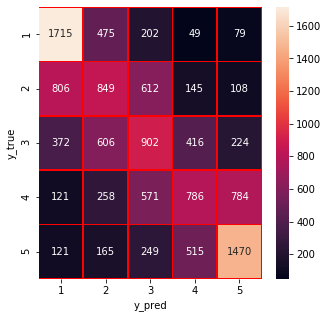

In [145]:
y_pred_rf=rf.predict(xtest)
confusion(ytest,y_pred_rf)

In [146]:
from sklearn.metrics import confusion_matrix, classification_report
report=pd.DataFrame(classification_report(ytest, y_pred_rf, output_dict=True)).transpose() #otra manera de hacer
print("Reporte de Clasificación RF optimizando hiperparámetros:")
report

Reporte de Clasificación RF optimizando hiperparámetros:


,precision,recall,f1-score,support
1,0.547049,0.680556,0.606543,2520.000000
2,0.360816,0.336905,0.348451,2520.000000
3,0.355678,0.357937,0.356804,2520.000000
4,0.411303,0.311905,0.354773,2520.000000
5,0.551595,0.583333,0.567020,2520.000000
accuracy,0.454127,0.454127,0.454127,0.454127
macro avg,0.445288,0.454127,0.446718,12600.000000
weighted avg,0.445288,0.454127,0.446718,12600.000000
